In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'/content/train_dataframes.csv')
df=df.head(2400)
df.head()

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


In [3]:
# df = df.drop(['datetime','week_X-2','week_X-3','week_X-4','MA_X-4','Holiday_ID','dayOfWeek'],axis=1)
df = df.drop(['datetime'],axis=1)
df

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472
...,...,...,...,...,...,...,...,...,...,...,...
2395,1141.7339,1155.0035,1134.9968,1130.197550,2,1,0,0,20,28.864343,1179.6642
2396,1150.9833,1120.9301,1119.3475,1114.924650,2,1,0,0,21,28.394952,1169.6609
2397,1098.9324,1086.5035,1076.2066,1069.196125,2,1,0,0,22,28.007379,1130.1839
2398,1046.2238,1036.6046,1035.0964,1020.072250,2,1,0,0,23,27.703516,1056.7580


In [4]:
df.describe()

,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1101.738399,1100.343114,1096.715473,1100.709228,3.950833,0.299583,0.100000,0.750000,11.500000,27.818392,1110.977497
std,193.323686,192.753572,190.984795,183.992408,2.011451,0.458171,0.300063,2.426923,6.923629,2.123312,194.936984
min,509.835800,509.835800,509.835800,797.735000,1.000000,0.000000,0.000000,0.000000,0.000000,24.192743,721.590800
25%,929.757375,929.934750,928.915625,927.604531,2.000000,0.000000,0.000000,0.000000,5.750000,26.022089,936.655875
50%,1066.621800,1066.452300,1064.688650,1076.481387,4.000000,0.000000,0.000000,0.000000,11.500000,27.196481,1076.347550
75%,1239.421175,1236.460350,1227.370075,1227.182156,6.000000,1.000000,0.000000,0.000000,17.250000,29.706247,1249.771450
max,1529.835700,1529.835700,1529.835700,1505.297400,7.000000,1.000000,1.000000,12.000000,23.000000,33.219751,1529.985500


In [5]:
X = df.drop(['DEMAND'],axis=1).values
X

array([[9.62286500e+02, 9.06958000e+02, 9.70345000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 2.53084961e+01],
       [9.33322100e+02, 8.63513500e+02, 9.12175500e+02, ...,
        0.00000000e+00, 2.00000000e+00, 2.51414429e+01],
       [9.03981700e+02, 8.48444700e+02, 9.00268800e+02, ...,
        0.00000000e+00, 3.00000000e+00, 2.50067383e+01],
       ...,
       [1.09893240e+03, 1.08650350e+03, 1.07620660e+03, ...,
        0.00000000e+00, 2.20000000e+01, 2.80073791e+01],
       [1.04622380e+03, 1.03660460e+03, 1.03509640e+03, ...,
        0.00000000e+00, 2.30000000e+01, 2.77035156e+01],
       [9.95414000e+02, 9.85935200e+02, 9.81401500e+02, ...,
        0.00000000e+00, 0.00000000e+00, 2.74936462e+01]])

In [6]:
Y = df['DEMAND'].values
Y

array([ 954.2018,  913.866 ,  903.3637, ..., 1130.1839, 1056.758 ,
       1010.6761])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred = model.predict(x_test)
y_pred

array([1050.20788593, 1415.27445567, 1249.90218435, 1327.09427714,
       1257.42210608, 1055.29751158, 1392.16059144, 1277.04690665,
       1377.79229169, 1327.91564384, 1358.87573733, 1170.30720525,
       1089.59829073,  982.71899287, 1198.97600591, 1047.4140643 ,
       1338.6153377 , 1482.06046978, 1297.13448933, 1370.5049185 ,
       1080.00287638,  869.92186218,  919.2295291 ,  976.23891281,
       1109.55251583, 1335.23494852, 1005.99534481,  899.65180438,
       1364.33332592, 1167.92415472, 1192.34725469, 1118.89050087,
       1040.08251707,  896.96776209,  771.7148533 ,  913.99209664,
       1368.42463644,  942.91542149, 1138.31082973, 1180.38048372,
        944.88010948, 1423.67696763,  926.94924727,  998.45369666,
        904.46063832, 1257.16742158, 1244.62877806,  990.04578159,
       1201.2314512 , 1206.17989218,  968.83805882,  987.35925239,
       1146.30859999, 1355.77059596, 1161.26349229, 1102.80103945,
       1423.70570527,  859.88831116, 1411.66739278,  923.11414

In [9]:
len(y_pred)/24

20.0

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8945760346050226

Text(0.5, 1.0, 'Actual vs Predicted')

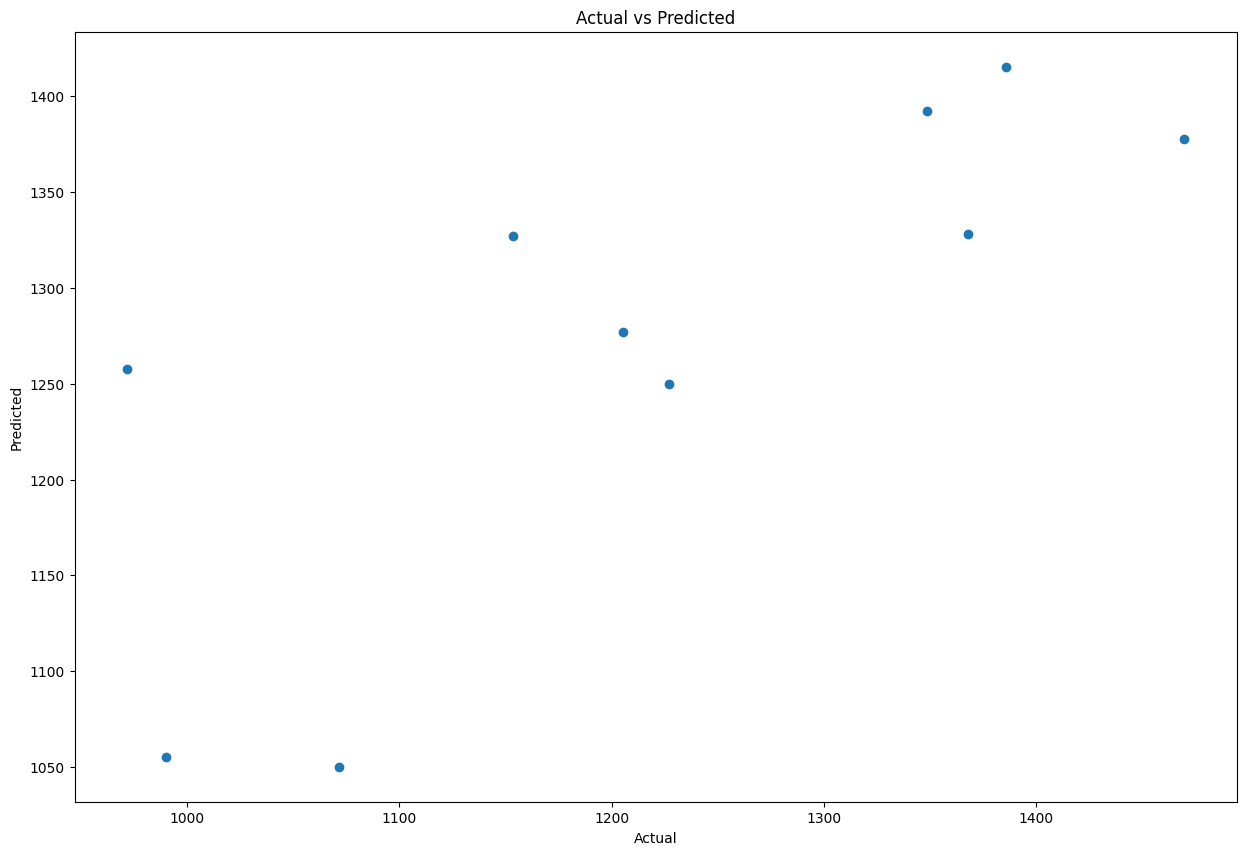

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test[:10],y_pred[:10])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [12]:
pred_y_df = pd.DataFrame({'Actual Values':y_test,'Predicted_values':y_pred,'Difference':y_test-y_pred})
pred_y_df

,Actual Values,Predicted_values,Difference
0,1071.4994,1050.207886,21.291514
1,1385.6637,1415.274456,-29.610756
2,1226.9633,1249.902184,-22.938884
3,1153.5647,1327.094277,-173.529577
4,971.8595,1257.422106,-285.562606
...,...,...,...
475,941.8521,920.007967,21.844133
476,862.1844,899.528240,-37.343840
477,979.5638,935.591102,43.972698
478,1227.3120,1223.983507,3.328493


In [15]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)


In [16]:
mean_absolute_percentage_error(pred_y_df['Actual Values'],pred_y_df['Predicted_values'])

3.98

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred_y_df['Actual Values'],pred_y_df['Predicted_values']))
rmse

62.951316872945114